<b> Dataset : </b> Concrete Compressive Strength

<b> Domain : </b>Material manufacturing

<b>Description: </b> The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not
scaled).The data has 8 quantitative input variables, and 1 quantitative output
variable, and 1030 instances (observations).

<b> Objective : </b>Modeling of strength of high performance concrete using Machine Learning


<b>Steps : </b>This project involved feature exploration and selection to predict the strength of high-performance concrete. Used Regression models like Decision tree regressors to find out the most important features and predict the strength. Cross-validation techniques and Grid search were used to tune the parameters for best model performance.

<b>Skills and Tools :</b> Regression, Decision trees, feature engineering

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/concrete-compressive-strength/concrete.csv


## Import the necessary libraries :

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from pprint import pprint
from matplotlib import pyplot
import time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

<b>Comment :</b> Here I have used numpy, pandas, matplotlib, seaborn, scipy for EDA and Data Visualization. Also used sklearn for data spliting, model building and for confusion matrix. 

# ::--------------------------- Exploratory Data Analysis -------------------------------- ::

In [3]:
df  = pd.read_csv('/kaggle/input/concrete-compressive-strength/concrete.csv')
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


<b>Comment:</b> Here I have read the Concrete dataset using read_csv() function of pandas. df is a dataframe. I have used head() funtion to display first 10 records of the dataset.

<b> Features(attributes) Understanding from the above dataframe :- </b> 
- <b>Cement </b> measured in kg in a m3 mixture
- <b>Blast </b> measured in kg in a m3 mixture
- <b>Fly ash </b> measured in kg in a m3 mixture
- <b>Water </b> measured in kg in a m3 mixture
- <b>Superplasticizer </b> measured in kg in a m3 mixture
- <b>Coarse Aggregate </b> measured in kg in a m3 mixture
- <b>Fine Aggregate </b> measured in kg in a m3 mixture
- <b>Age </b> day (1~365)

<b>Concrete compressive strength:-</b> measured in MPa



### Shape of the data :- 

In [4]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)


Total Number of rows : 1030
Total Number of columns : 9


<b>Comment:</b> Shape of the dataframe is (1030, 9).
There are 1030 rows and 9 columns in the dataset. 

###  Data type of each attribute :-

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<b>Comment :</b> Here we can see that all the variables are numerical.

### Checking the presence of missing values :-

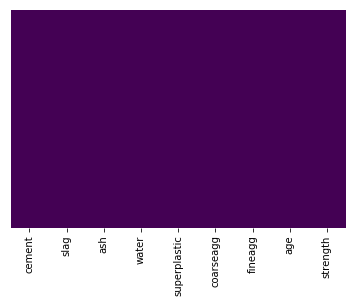

In [6]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

<b>Observation : </b> From above heatmap we can see that there is no missing values are present.

In [7]:
df.apply(lambda x: sum(x.isnull()))

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

###  Descriptive Statistics :-

In [8]:
df_transpose = df.describe().T
df_transpose

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


<b>Observations : </b> From above we can see that Mean and the median is nearly same for the Cement, Water, Superplastic, Coarseagg, Fineagg, Strength so we can say it is approximately normally distributed. Slag, Ash, Age are having much values at the maximum portion so we can say it is skewed towards right side.

### Copying Dataframe :-
- Before doing any manipulation with the dataframe it is better to copy the dataframe into another dataframe and keep the original dataframe as it is.

In [9]:
concrete_df = df.copy()

## Checking the presence of outliers :-

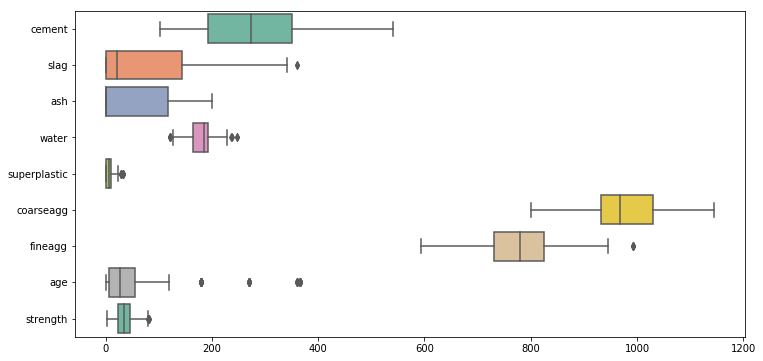

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=concrete_df, orient="h", palette="Set2", dodge=False)

<b>Observation : </b> From the above boxplot we can see that there are outliers in some columns. From the above ploting I can say slag, water, superplastic, fineagg and age column are having clear outliers. Let see these plots separately. I will be finding the outliers counts in individual attributes analysis and <b>fixing the outliers</b> after visualization and analysis of each attribute.

# ::-------------------------------------- Data Visualization ------------------------------------::

###  Pair plot that includes all the columns of the data frame :-

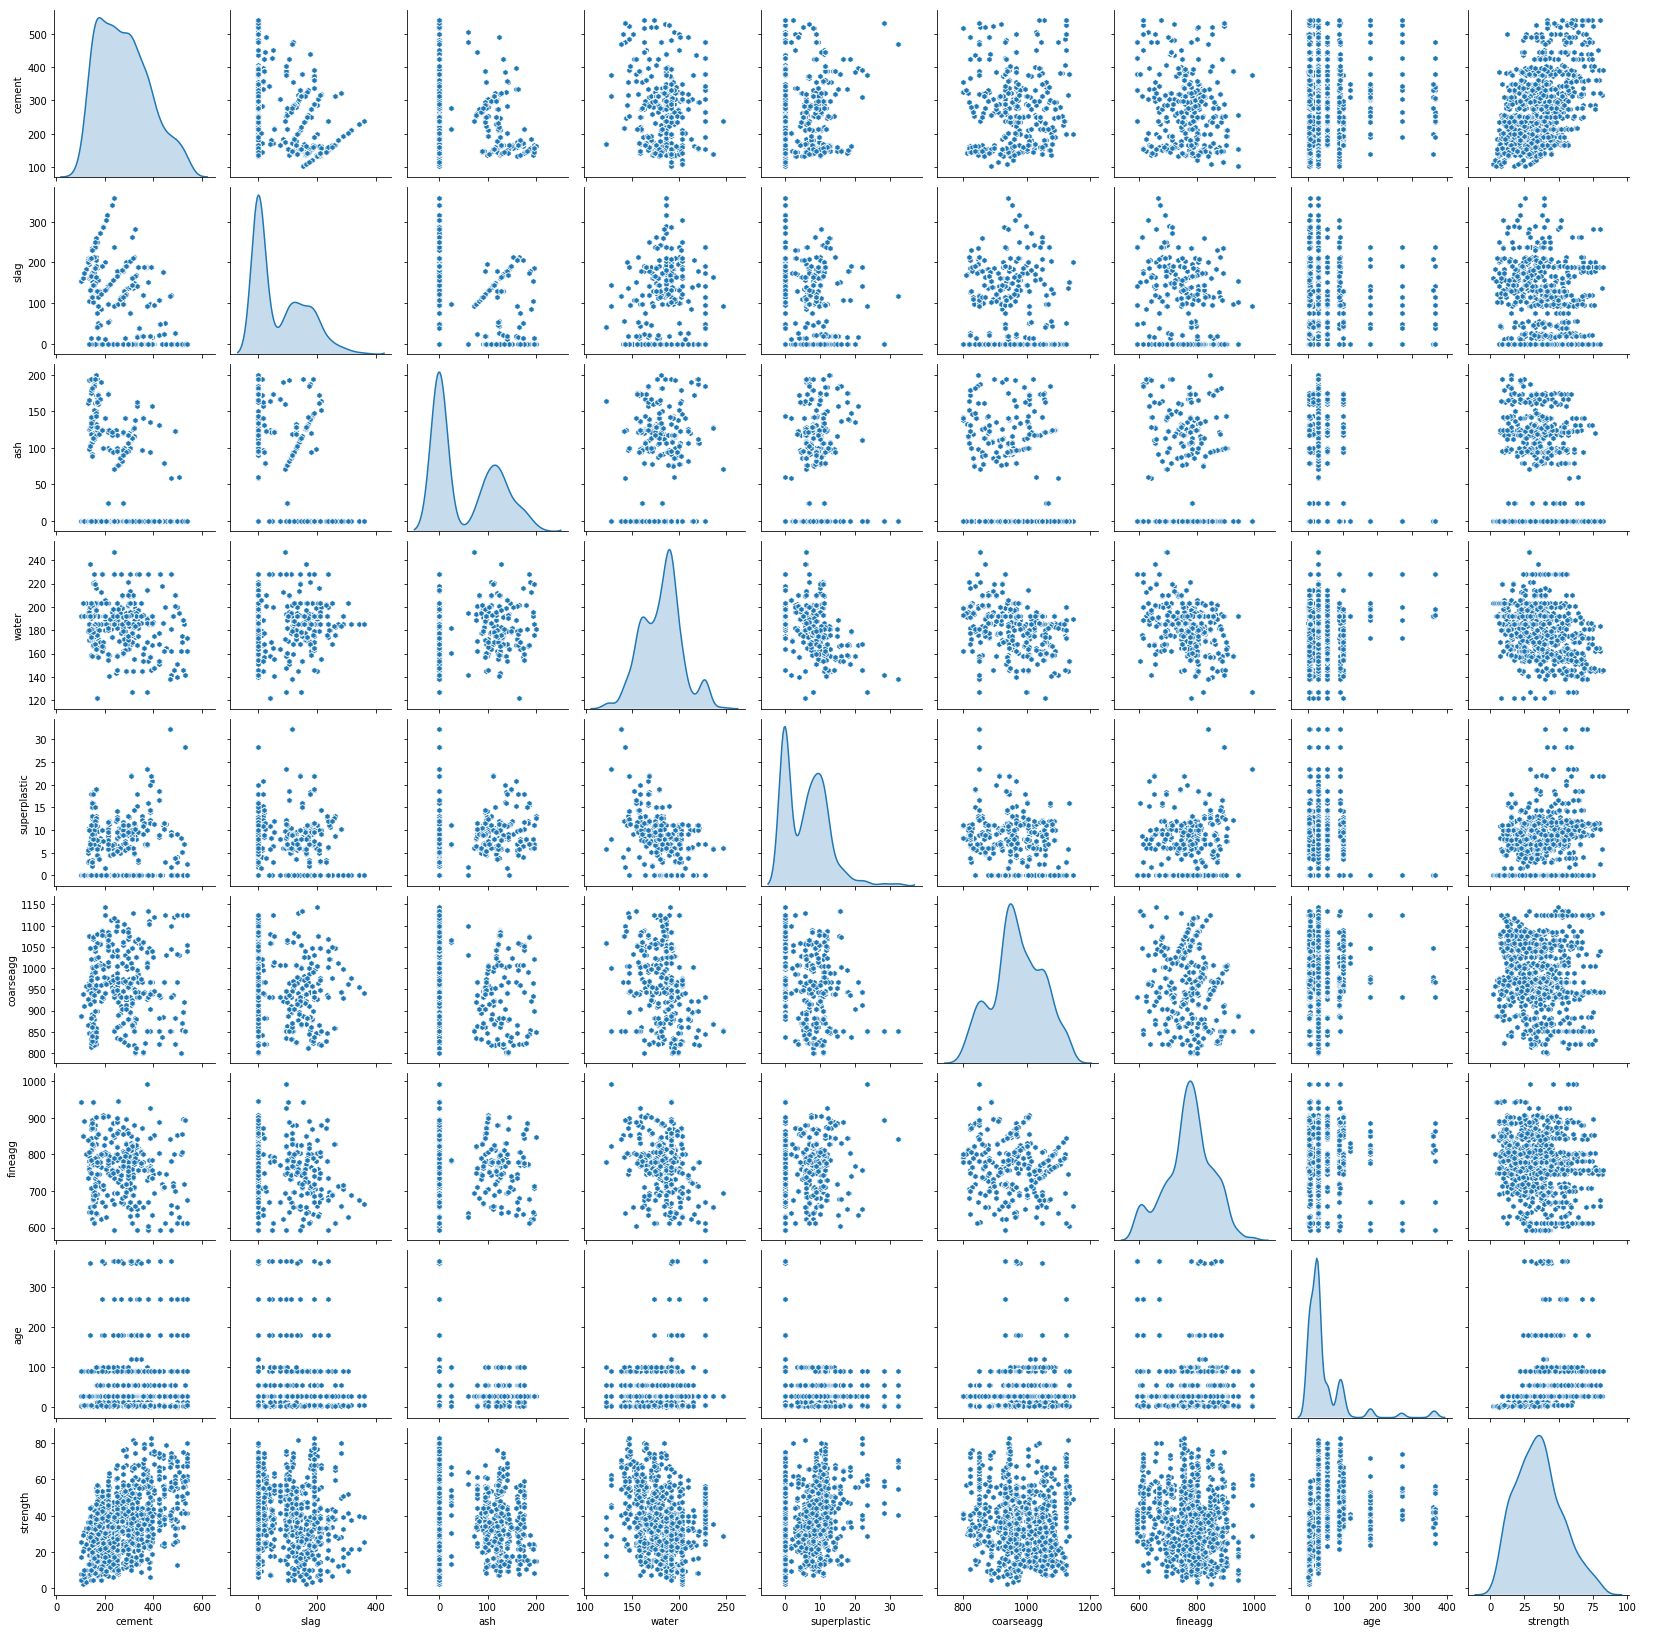

In [11]:
sns.pairplot(concrete_df,markers="h", diag_kind = 'kde')
plt.show()

<b>Observation : </b> From the above pair plot we can infer the association among the attributes and target column as follows:
- No high correlation between any two features
- Strength have some possitive linear relation with cement and some with superplastic that means if the quantity of cement or superplastic is more then concrete is having more strength.
- More strength is between 20-150 days aprox.
- Strength is again decreasing again after 250 days approx.
- Also It is quite visible multiple gaussian slag,ash,water, superplastic, age.
- slag, cement and ash also have a tendency to create linear relation but it's not prominant.
- Rest of the relation between other individual attributes are mostly formed cloud shape or symmetrical shape.

## Analysis of each attributes with the help of plots :-

### Cement  :-

Text(0.5, 0, 'cement')

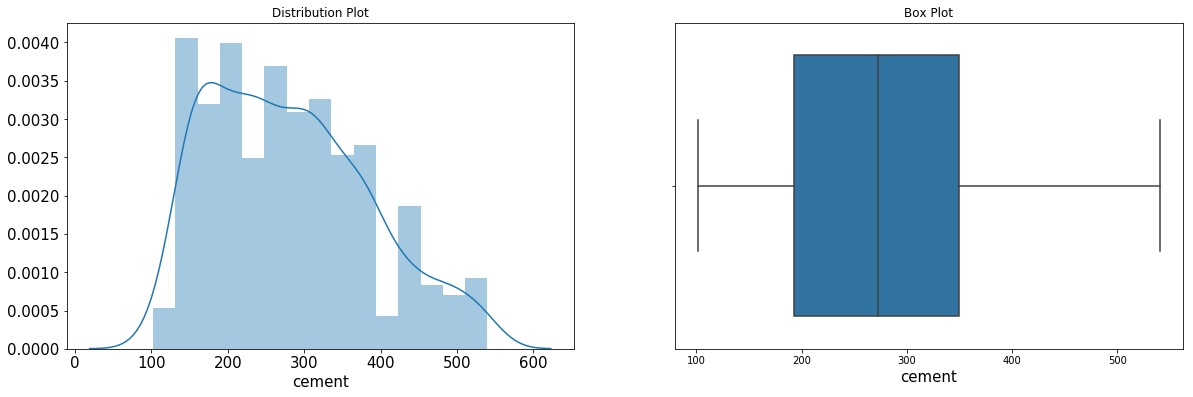

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(concrete_df['cement'],ax=ax1)
ax1.tick_params(labelsize=15)
ax1.set_xlabel('cement', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(concrete_df['cement'],ax=ax2)
ax2.set_title("Box Plot")
ax2.set_xlabel('cement', fontsize=15)

<b>Insight : </b>From above we can see that there are no outliers in cement column and it's looks like normally distributed. Cemennt values lies between range 100 to 500. 

### Slag :-

Text(0.5, 1.0, 'Box Plot')

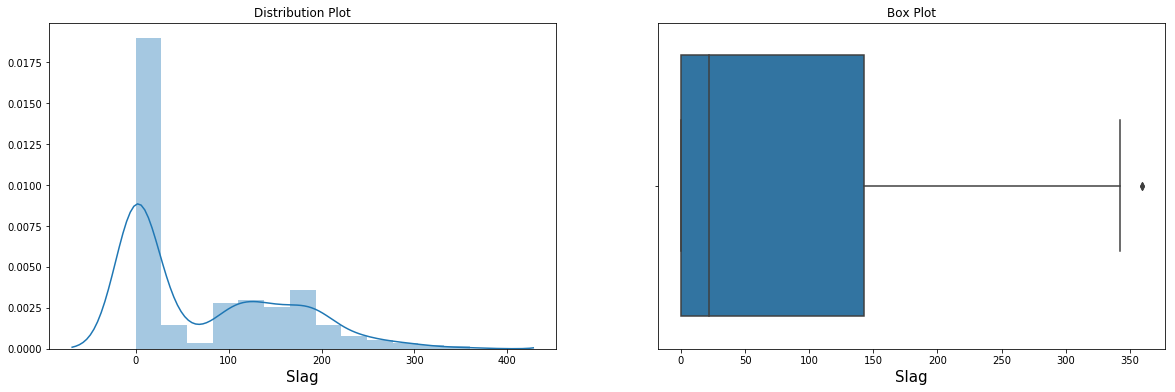

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(concrete_df['slag'],ax=ax1)
ax1.set_xlabel('Slag', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(concrete_df['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_title("Box Plot")


<b>Insight: </b>From above boxplot we can see that there are outliers in slug values lies between range 100 to 200. 400 is the higest slug value.

### Ash :-

Text(0.5, 1.0, 'Box Plot')

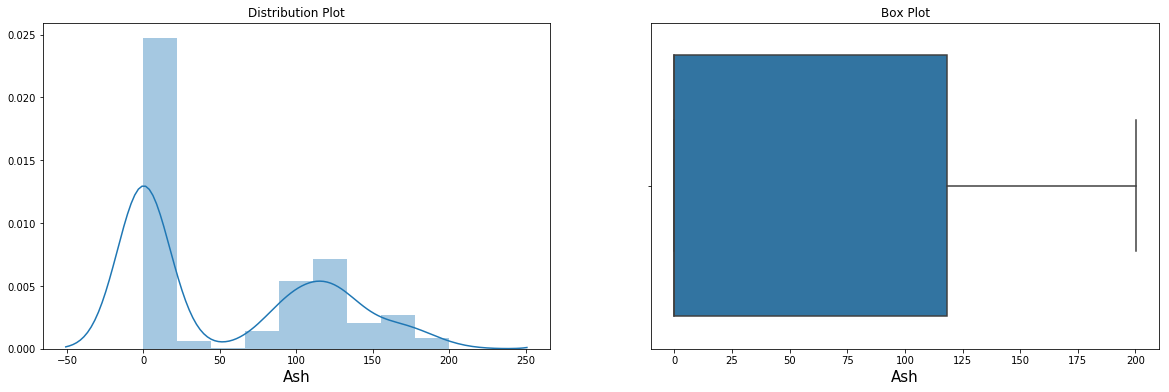

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(concrete_df['ash'],ax=ax1)
ax1.set_xlabel('Ash', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(concrete_df['ash'],ax=ax2)
ax2.set_xlabel('Ash', fontsize=15)
ax2.set_title("Box Plot")


<b>Insight :</b> From above we can see that there are no outliers in ash column. We can see a tall tower at range of 0 to 20 which indicates if slug value is between 100 and 200.

### Water :-

Text(0.5, 1.0, 'Box Plot')

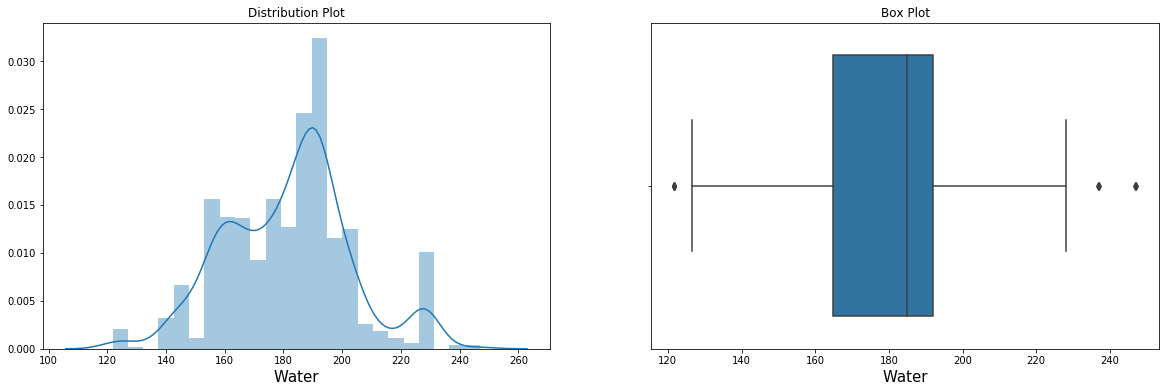

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(concrete_df['water'],ax=ax1)
ax1.set_xlabel('Water', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(concrete_df['water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.set_title("Box Plot")



<b>Insight : </b>From above we can see that there are outliers in water column and there is right skewness because long tail is at the right side.
####  As ouliers are there in water so we will check how many outliers are there in the water.

In [16]:
outlier_columns = []

Q1 =  concrete_df['water'].quantile(0.25) # 1º Quartile
Q3 =  concrete_df['water'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

LTV_water = Q1 - 1.5 * IQR   # lower bound 
UTV_water = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('water <',LTV_water ,'and >',UTV_water, ' are outliers')
print('Numerber of outliers in water column below the lower whisker =', concrete_df[concrete_df['water'] < (Q1-(1.5*IQR))]['water'].count())
print('Numerber of outliers in water column above the upper whisker =', concrete_df[concrete_df['water'] > (Q3+(1.5*IQR))]['water'].count())

# storing column name and upper-lower bound value where outliers are presense 
outlier_columns.append('water')
upperLowerBound_Disct = {'water':UTV_water}

Interquartile range =  27.099999999999994
water < 124.25000000000001 and > 232.64999999999998  are outliers
Numerber of outliers in water column below the lower whisker = 5
Numerber of outliers in water column above the upper whisker = 4


## Superplastic :-

Text(0.5, 1.0, 'Box Plot')

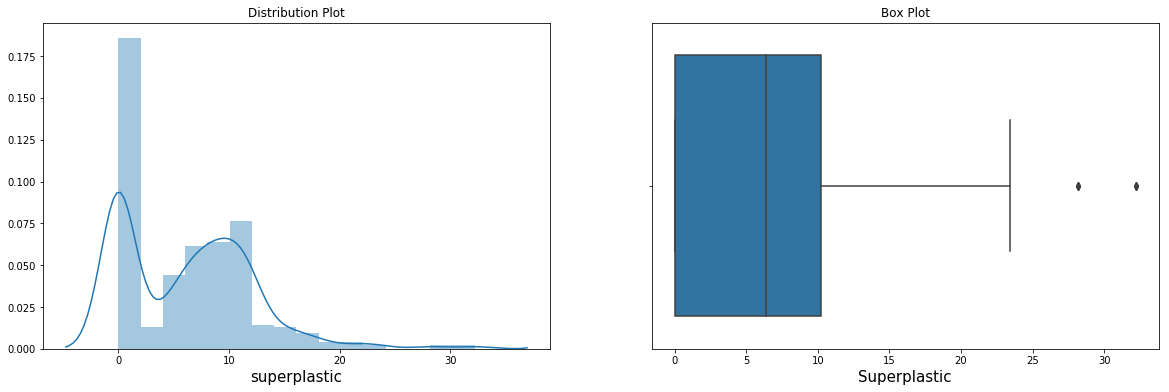

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(concrete_df['superplastic'],ax=ax1)
ax1.set_xlabel('superplastic', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(concrete_df['superplastic'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_title("Box Plot")


<b> Insight : </b>From above we can see that there are outliers in superplastic column and there is right skewness because long tail is at right side(mean>median).

<b>As outliers are there in superplastic so  we will check how many outliers are there in the superplastic.</b>

In [18]:
Q1 =  concrete_df['superplastic'].quantile(0.25) # 1º Quartile
Q3 =  concrete_df['superplastic'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

LTV_superplastic = Q1 - 1.5 * IQR   # lower bound 
UTV_superplastic = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('superplastic <',LTV_superplastic ,'and >',UTV_superplastic, ' are outliers')
print('Numerber of outliers in superplastic column below the lower whisker =', concrete_df[concrete_df['superplastic'] < (Q1-(1.5*IQR))]['superplastic'].count())
print('Numerber of outliers in superplastic column above the upper whisker =', concrete_df[concrete_df['superplastic'] > (Q3+(1.5*IQR))]['superplastic'].count())

# storing column name and upper-lower bound value where outliers are presense
outlier_columns.append('superplastic')
upperLowerBound_Disct['superplastic'] = UTV_superplastic

Interquartile range =  10.2
superplastic < -15.299999999999999 and > 25.5  are outliers
Numerber of outliers in superplastic column below the lower whisker = 0
Numerber of outliers in superplastic column above the upper whisker = 10


## Coarseagg :-

Text(0.5, 1.0, 'Box Plot')

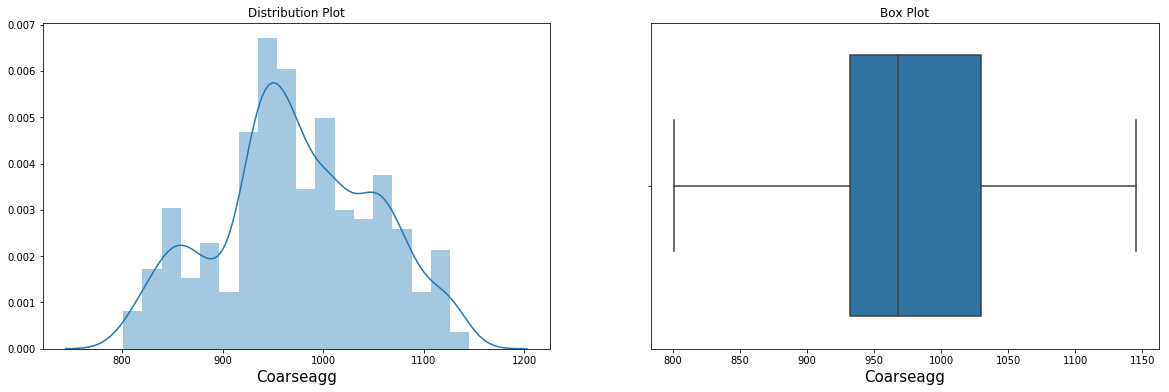

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(concrete_df['coarseagg'],ax=ax1)
ax1.set_xlabel('Coarseagg', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(concrete_df['coarseagg'],ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_title("Box Plot")

<b>Insight : </b>From above we can see that there are no outliers in coarseagg and there is a right skewness because long tail is at right side(mean>median).

## Fineagg :-

Text(0.5, 1.0, 'Box Plot')

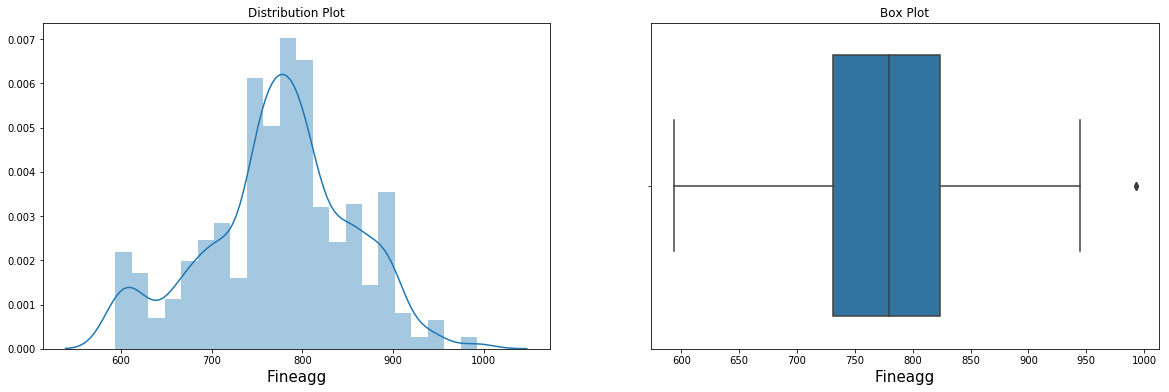

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(concrete_df['fineagg'],ax=ax1)
ax1.set_xlabel('Fineagg', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(concrete_df['fineagg'],ax=ax2)
ax2.set_xlabel('Fineagg', fontsize=15)
ax2.set_title("Box Plot")


<b>Insight : </b>From above we can see that there are outliers in Fineagg column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median).

## Age :-

Text(0.5, 1.0, 'Box Plot')

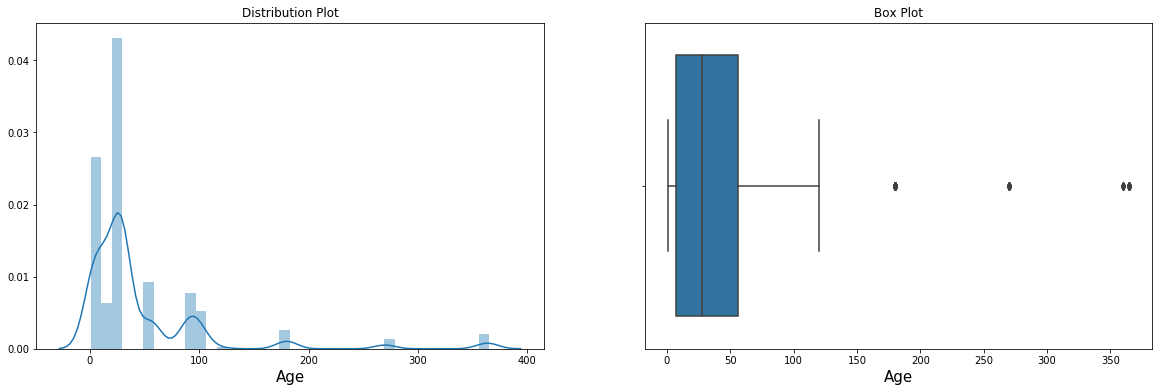

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(concrete_df['age'],ax=ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(concrete_df['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_title("Box Plot")

<b>Insight : </b>From above we can see that there are outliers in Age column and there are many peaks in distribution plot and there is left skewness because long tail is at left side(mean<median).

In [22]:
Q1 =  concrete_df['age'].quantile(0.25) # 1º Quartile
Q3 =  concrete_df['age'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

LTV_age = Q1 - 1.5 * IQR   # lower bound 
UTV_age = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('age <',LTV_age ,'and >',UTV_age, ' are outliers')
print('Numerber of outliers in age column below the lower whisker =', concrete_df[concrete_df['age'] < (Q1-(1.5*IQR))]['age'].count())
print('Numerber of outliers in age column above the upper whisker =', concrete_df[concrete_df['age'] > (Q3+(1.5*IQR))]['age'].count())

# storing column name and upper-lower bound value where outliers are presense
outlier_columns.append('age')
upperLowerBound_Disct['age'] = UTV_age

Interquartile range =  49.0
age < -66.5 and > 129.5  are outliers
Numerber of outliers in age column below the lower whisker = 0
Numerber of outliers in age column above the upper whisker = 59


## Strength :-

Text(0.5, 0, 'strength')

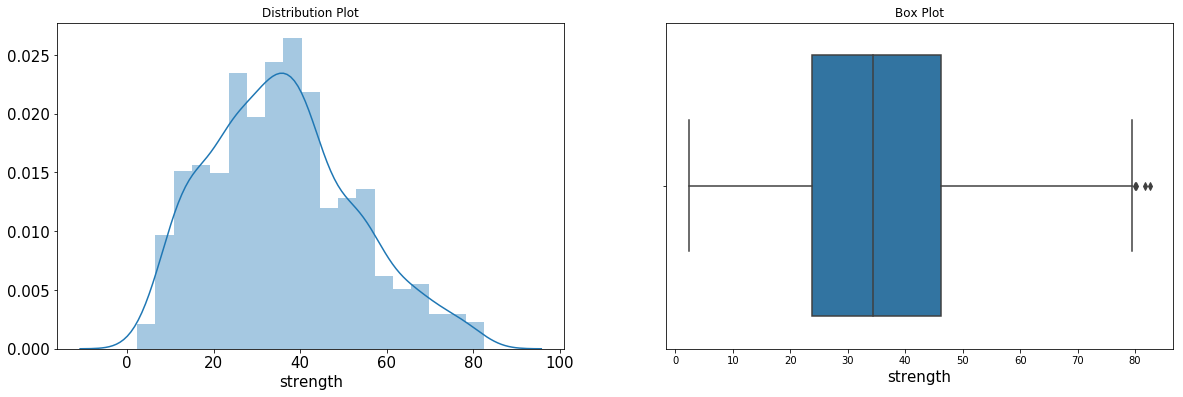

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(concrete_df['strength'],ax=ax1)
ax1.tick_params(labelsize=15)
ax1.set_xlabel('strength', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(concrete_df['strength'],ax=ax2)
ax2.set_title("Box Plot")
ax2.set_xlabel('strength', fontsize=15)

<b>Insight : </b>From above we can see that there are no outliers in strength column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

## ----------------------------------------------- Fixing Outliers -----------------------------------------------------

- As we have seen above outlier are presence in the given dataset.
- There are multiple ways to deal with outliers but I mostly prefer either to drop the outliers or repalce it with median/mean.
- Here I am going to replace the outliers with median becase if we drop then ther may be chance to loose some important information.
- I have also shown the number of outliers presence in each column in below code.

In [24]:
print('These are the columns which have outliers : \n\n',outlier_columns)
print('\n\n',upperLowerBound_Disct)

These are the columns which have outliers : 

 ['water', 'superplastic', 'age']


 {'water': 232.64999999999998, 'superplastic': 25.5, 'age': 129.5}


In [25]:
concrete_df_new = concrete_df.copy()

In [26]:
for col_name in concrete_df_new.columns[:-1]:
    q1 = concrete_df_new[col_name].quantile(0.25)
    q3 = concrete_df_new[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    concrete_df_new.loc[(concrete_df_new[col_name] < low) | (concrete_df_new[col_name] > high), col_name] = concrete_df_new[col_name].median()

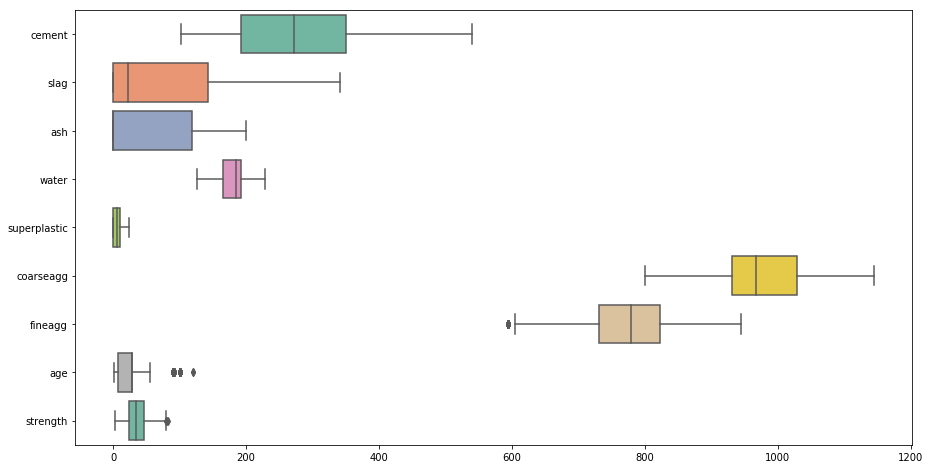

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(data=concrete_df_new, orient="h", palette="Set2", dodge=False)

<b>Important : </b> Now we can see in boxplot that most of the outliers are replaced with their median in dataframe. We have seen that outliers most of the outliers are removed but because of the gaussian by replacing it with median value, the attributes raised with new outliers which we can ignore. 

#### After fixing outliers shape of dataframe:

In [28]:
concrete_df_new.shape

(1030, 9)

## Creating and view the correlation matrix :-

In [29]:
concrete_df_new.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275046,-0.397467,-0.091614,0.013336,-0.109349,-0.238698,-0.031962,0.497832
slag,-0.275046,1.000000,-0.320468,0.098880,0.061195,-0.283882,-0.282383,-0.028971,0.137800
ash,-0.397467,-0.320468,1.000000,-0.248011,0.447492,-0.009961,0.091729,0.057928,-0.105755
water,-0.091614,0.098880,-0.248011,1.000000,-0.658056,-0.156928,-0.426299,-0.040304,-0.307711
superplastic,0.013336,0.061195,0.447492,-0.658056,1.000000,-0.224503,0.156591,0.062013,0.346260
coarseagg,-0.109349,-0.283882,-0.009961,-0.156928,-0.224503,1.000000,-0.161377,0.018078,-0.164935
fineagg,-0.238698,-0.282383,0.091729,-0.426299,0.156591,-0.161377,1.000000,0.051532,-0.182186
age,-0.031962,-0.028971,0.057928,-0.040304,0.062013,0.018078,0.051532,1.000000,0.499850
strength,0.497832,0.137800,-0.105755,-0.307711,0.346260,-0.164935,-0.182186,0.499850,1.000000


## ---------------------------------------- Correlation using Heatmap --------------------------------------------

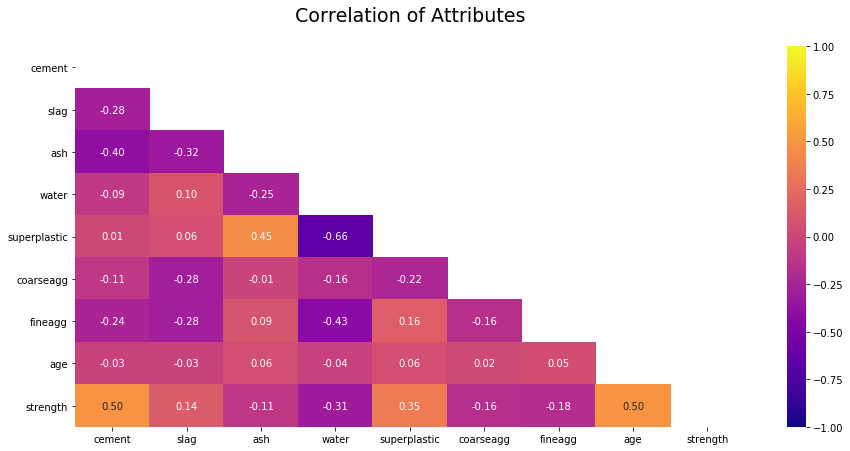

In [30]:
mask = np.zeros_like(concrete_df_new.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(concrete_df_new.corr(),vmin=-1, cmap='plasma',annot=True,  mask=mask, fmt='.2f')

<b>Correlation Insight :</b>- From above correlation matrix we can see that there are many features which are  correlated. if we see carefully then ash and cement are having corelation of -0.40. superplastic and water are having corelation of -0.66 . fineagg and water are having corelation of -0.45. Age and strenght have correlation of 0.50.
Little correlation of ~0.6 between Superplasticizer and Water (which is negative as evident from scatter matrix), but lets move forward as it is.

'cement' has the highest correlation with the area of 'concrete_compressive_strength'(which is a positive correlation), followed by 'superplasticizer', which is also a positive correlation, 'ash' has the least correlation.

## KMeans Clustering :-

In [31]:
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_df_new)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,2.774842e+07
1,3,2.141025e+07
2,4,1.868905e+07
3,5,1.673076e+07


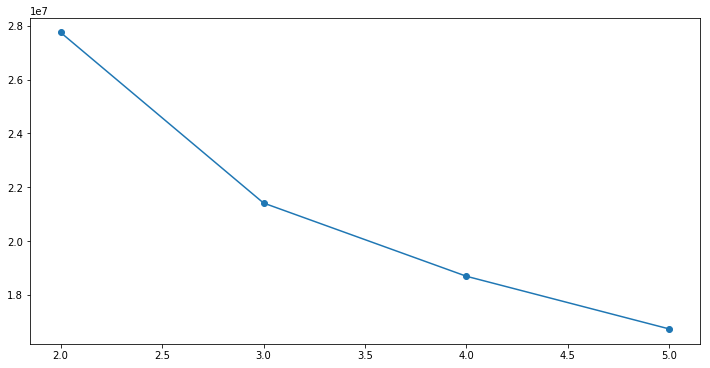

In [32]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

<b>Insight: </b>The elbow plot confirms our visual analysis that there are likely 3 good clusters.

In [33]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(concrete_df_new)

prediction=cluster.predict(concrete_df_new)
concrete_df_new["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

concrete_df_new_copy = concrete_df_new.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [34]:
centroids = cluster.cluster_centers_
centroids

array([[ 225.43850575,   11.32471264,  101.04626437,  174.68591954,
           6.95948276, 1016.24827586,  814.8091954 ,   36.1637931 ,
          29.62847701],
       [ 224.20994318,  174.48465909,   33.884375  ,  187.91505682,
           5.32017045,  943.28835227,  747.18636364,   30.20454545,
          35.58485795],
       [ 400.69212121,   30.54030303,   26.43212121,  182.32090909,
           5.63090909,  958.83212121,  755.02787879,   30.32424242,
          42.59369697]])

<b>Comment :</b> From above we can see that all three groups are at same lavel, I dont find any difference so we will not be proceding with the clustering.

## Standardization Independent Varaibles :-

In [35]:
# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here
XScaled = concrete_df_new.apply(zscore)
XScaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
0,-1.339017,1.625902,-0.847144,1.060879,-1.091166,-0.014398,-0.305676,-0.153159,-0.355018,0.021545
1,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.300692,-0.656933,-0.737108,-1.211289
2,-0.298384,-0.858192,0.648965,0.279067,-0.086509,-0.206121,1.126981,-0.153159,-0.395144,-1.211289
3,-0.145209,0.477594,-0.847144,2.250592,-1.091166,-0.526517,-1.303578,-0.153159,0.600806,0.021545
4,-1.209776,1.290784,-0.847144,0.565570,0.571085,0.958372,-0.964165,-0.153159,-1.049727,0.021545


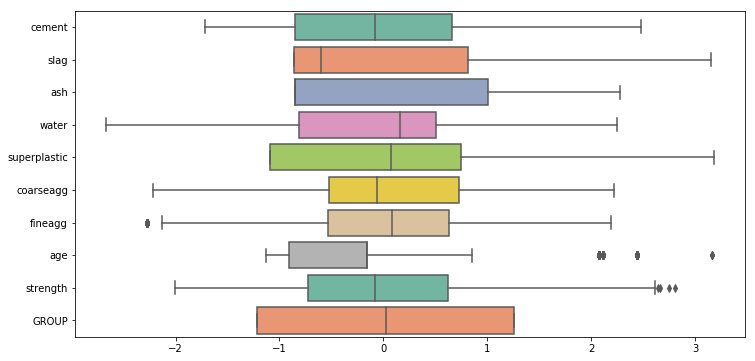

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(data=XScaled, orient="h", palette="Set2", dodge=False)

<b>Insight: </b> From above graph we see that the result of standardization(Z-score) is that the features are rescaled and their properties of a standard normal distribution changed to μ=0 and σ=1.

## Separating Independent and Dependent :-

In [37]:
y_set = XScaled[['strength']]
X_set = XScaled.drop(labels= "strength" , axis = 1)

## We will be  creating create 3 part of our dataset. We'll be working working test and validation data. And one part of data will be kept for Test the final score of our models.

In [38]:
y_set = XScaled[['strength']]
X_set = XScaled.drop(labels= "strength" , axis = 1)

# data spliting using 80:20 train test data ratio and randon seeding 7
X_model_train, X_test, y_model_train, y_test = train_test_split(X_set, y_set, test_size=0.20, random_state=7)

In [39]:
print('---------------------- Data----------------------------- \n')
print('x train data {}'.format(X_model_train.shape))
print('y train data {}'.format(y_model_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))


---------------------- Data----------------------------- 

x train data (824, 9)
y train data (824, 1)
x test data  (206, 9)
y test data  (206, 1)


In [40]:
# data spliting using 70:30 train test data ratio and randon seeding 7
X_train, X_validate, y_train, y_validate = train_test_split(X_model_train, y_model_train, test_size=0.30, random_state=7)

In [41]:
print('---------------------- Data----------------------------- \n')
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_validate.shape))
print('y test data  {}'.format(y_validate.shape))


---------------------- Data----------------------------- 

x train data (576, 9)
y train data (576, 1)
x test data  (248, 9)
y test data  (248, 1)


# :::::::::::::::::::::::::::::::::::::::: Model Building :::::::::::::::::::::::::::::::::::::::::

In [42]:
# Defining the kFold function for the cross validation
n_split = 10
randon_state = 7
kfold = KFold(n_split, random_state = randon_state)
linear_model = []
linear_model_score = []
linear_model_RMSE = []
linear_model_R_2 = []
Model = []
RMSE = []
R_sq = []

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## Linear Regression :-

In [43]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
linear_model.append('Linear Regression')
# coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

lr_score = regression_model.score(X_validate, y_validate)
linear_model_score.append(lr_score)
print("Linear Regression Model Score:",lr_score)

lr_rmse = np.sqrt((-1) * cross_val_score(regression_model, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Linear Regression Model RMSE :", lr_rmse)

linear_model_RMSE.append(lr_rmse)

lr_r2 = cross_val_score(regression_model, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Linear Regression Model R-Square Value :",lr_r2)


linear_model_R_2.append(lr_r2)

The coefficient for cement is 0.6565128673717249
The coefficient for slag is 0.36613865128578726
The coefficient for ash is 0.11470605392026693
The coefficient for water is -0.2132298277225227
The coefficient for superplastic is 0.08262746649580076
The coefficient for coarseagg is -0.03174105543369177
The coefficient for fineagg is -0.08907834270618538
The coefficient for age is 0.50258493741181
The coefficient for GROUP is -0.06998317127061882
The intercept for our model is -0.003915595934589764
Linear Regression Model Score: 0.7272878401623206
Linear Regression Model RMSE : 0.5621886338798164
Linear Regression Model R-Square Value : 0.6888764291418077


## Polynomial Regression - Degree 2 ::-

In [44]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_validate)
print("Shape", X_train_.shape)
linear_model.append('Polynomial Features - 2D')

poly_clf = LinearRegression()

poly_clf.fit(X_train_, y_train)

pf_score = poly_clf.score(X_test_, y_validate)
print("2D Polynomial Model Score:",pf_score)
linear_model_score.append(pf_score)

pf_rmse = np.sqrt((-1) * cross_val_score(poly_clf, X_train_, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("2D Polynomial Model RMSE :", pf_rmse)
linear_model_RMSE.append(pf_rmse)

pf_r2 = cross_val_score(poly_clf, X_train_, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
linear_model_R_2.append(pf_r2)
print("2D Polynomial Model R-Square Value :", pf_r2)

Shape (576, 46)
2D Polynomial Model Score: 0.7936818624059063
2D Polynomial Model RMSE : 0.5447871034105517
2D Polynomial Model R-Square Value : 0.7055833297009053


## Polynomial Regression - Degree 3 ::-

In [45]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train__ = poly.fit_transform(X_train)
X_test__ = poly.fit_transform(X_validate)
print("Shape", X_train__.shape)
linear_model.append('Polynomial Features - 3D')

poly_clf_3d = LinearRegression()

poly_clf_3d.fit(X_train__, y_train)

pf3_score = poly_clf_3d.score(X_test__, y_validate)
print("3D Polynomial Model Score:",pf3_score)
linear_model_score.append(pf3_score)

pf3_rmse = np.sqrt((-1) * cross_val_score(poly_clf_3d, X_train__, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("3D Polynomial Model RMSE :",pf3_rmse)
linear_model_RMSE.append(pf3_rmse)

pf3_r2 = cross_val_score(poly_clf_3d, X_train__, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("3D Polynomial Model R-Square Value :",pf3_r2)
linear_model_R_2.append(pf3_r2)

Shape (576, 130)
3D Polynomial Model Score: 0.7551316619240153
3D Polynomial Model RMSE : 0.682340834827917
3D Polynomial Model R-Square Value : 0.5290981373443875


## Ridge ::-

In [46]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
linear_model.append('Ridge - with general data')
print ("Coefficients of the Ridge model",ridge.coef_)
rid_score = ridge.score(X_validate, y_validate)
linear_model_score.append(rid_score)
print("Ridge Model Score:", rid_score)
rig_rmse = np.sqrt((-1) * cross_val_score(ridge, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Ridge Model RMSE :", rig_rmse)
linear_model_RMSE.append(rig_rmse)
rid_r2 = cross_val_score(ridge, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Ridge Model R-Square Value :",rid_r2)
linear_model_R_2.append(rid_r2)


ridge_pf2 = Ridge(alpha=.3)
ridge_pf2.fit(X_train_,y_train)
linear_model.append('Ridge - with 2d Polynomial features')
print("Coefficients of the Ridge Model - with 2d Polynomial features")
print (ridge_pf2.coef_)
rid_score = ridge_pf2.score(X_test_, y_validate)
linear_model_score.append(rid_score)
print("Ridge Model (2d Polynomial features) Score:",rid_score)
rig_rmse = np.sqrt((-1) * cross_val_score(ridge_pf2, X_train_, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Ridge Model (2d Polynomial features) RMSE :", rig_rmse)
linear_model_RMSE.append(rig_rmse)
rid_r2 = cross_val_score(ridge_pf2, X_train_, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Ridge Model (2d Polynomial features) R-Square Value :",rid_r2)
linear_model_R_2.append(rid_r2)

Coefficients of the Ridge model [[ 0.65367831  0.36370819  0.11276415 -0.21444598  0.08291041 -0.03296976
  -0.09079396  0.50235417 -0.06938974]]
Ridge Model Score: 0.7273038032961618
Ridge Model RMSE : 0.562155060967218
Ridge Model R-Square Value : 0.6889182913053644
Coefficients of the Ridge Model - with 2d Polynomial features
[[ 0.          0.7937906   0.51853601  0.20797114 -0.16524353  0.08876797
   0.00719232  0.00111228  0.47925489 -0.0894003   0.09828472  0.05447399
  -0.21889272 -0.14109033  0.08265356  0.11844831  0.11968206 -0.06847014
   0.13410108 -0.08910882 -0.12712057  0.05819591  0.1801706   0.18204304
  -0.03014288 -0.27417316 -0.30395749  0.00105395  0.09099854  0.12949368
   0.03430678 -0.01087448 -0.17061298 -0.08897598 -0.02382714  0.04090107
  -0.12569384 -0.13195738 -0.02029455 -0.10360441 -0.00431569  0.07934084
  -0.03148574  0.08677548 -0.07735625  0.01531988]]
Ridge Model (2d Polynomial features) Score: 0.7936004614435038
Ridge Model (2d Polynomial features)

## Lasso ::-

In [47]:
lasso = Lasso(alpha=.3)
lasso.fit(X_train,y_train)
linear_model.append('Lasso - with general data')
print("Coefficients of the Lasso model")
print (lasso.coef_)
lasso_score = lasso.score(X_validate, y_validate)
linear_model_score.append(lasso_score)
print("Lasso Model Score:", lasso_score)
lasso_rmse = np.sqrt((-1) * cross_val_score(lasso, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Lasso Model RMSE :", lasso_rmse)
linear_model_RMSE.append(lasso_rmse)
lasso_r2 = cross_val_score(lasso, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Lasso Model R-Square Value :",lasso_r2)
linear_model_R_2.append(lasso_r2)


lasso_pf2 = Lasso(alpha=.3)
lasso_pf2.fit(X_train_,y_train)
linear_model.append('Lasso - with 2d Polynomial features')
print("Coefficients of the Lasso Model - with 2d Polynomial features")
print (lasso_pf2.coef_)
lasso_pf2_score = lasso_pf2.score(X_test_, y_validate)
linear_model_score.append(lasso_pf2_score)
print("Lasso Model (2d Polynomial features) Score:",lasso_pf2_score)
lasso_pf2_rmse = np.sqrt((-1) * cross_val_score(lasso_pf2, X_train_, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Lasso Model (2d Polynomial features) RMSE :", lasso_pf2_rmse)
linear_model_RMSE.append(lasso_pf2_rmse)
lasso_pf2_r2 = cross_val_score(lasso_pf2, X_train_, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Lasso Model (2d Polynomial features) R-Square Value :", lasso_pf2_r2)
linear_model_R_2.append(lasso_pf2_r2)

Coefficients of the Lasso model
[ 0.20675334  0.         -0.         -0.          0.0334767  -0.
 -0.          0.20182272  0.        ]
Lasso Model Score: 0.34727729335272284
Lasso Model RMSE : 0.825582098151137
Lasso Model R-Square Value : 0.3277665647091323
Coefficients of the Lasso Model - with 2d Polynomial features
[ 0.          0.20675334  0.         -0.         -0.          0.0334767
 -0.         -0.          0.20182272  0.          0.         -0.
 -0.          0.         -0.         -0.          0.          0.
 -0.         -0.          0.         -0.          0.          0.
 -0.          0.         -0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.          0.         -0.        ]
Lasso Model (2d Polynomial features) Score: 0.34727729335272284
Lasso Model (2d Polynomial features) RMSE : 0.8255820981511369
Lasso Model (2d Polynomial features) R-S

<b>Comment: </b> From above I can see Lasso model decreases the features number to 3. But that effecting the model performace as well a quite.

### Here I am comparing Linear and polynomial features

In [48]:
compare_lr_model_df = pd.DataFrame({'Model': linear_model,
                           'Score': linear_model_score,
                           'RMSE': linear_model_RMSE,
                           'R Squared': linear_model_R_2})
print("BELOW ARE THE TRAINING SCORES: ")
compare_lr_model_df

BELOW ARE THE TRAINING SCORES: 


,Model,Score,RMSE,R Squared
0,Linear Regression,0.727288,0.562189,0.688876
1,Polynomial Features - 2D,0.793682,0.544787,0.705583
2,Polynomial Features - 3D,0.755132,0.682341,0.529098
3,Ridge - with general data,0.727304,0.562155,0.688918
4,Ridge - with 2d Polynomial features,0.793600,0.544051,0.706355
5,Lasso - with general data,0.347277,0.825582,0.327767
6,Lasso - with 2d Polynomial features,0.347277,0.825582,0.327767


In [49]:
compare_lr_model_df[(compare_lr_model_df['RMSE'] == compare_lr_model_df['RMSE'].min()) & (compare_lr_model_df['R Squared'] == compare_lr_model_df['R Squared'].max())]

,Model,Score,RMSE,R Squared
4,Ridge - with 2d Polynomial features,0.7936,0.544051,0.706355


<b>Comment : </b> From the above we see the Ridge - with 2d Polynomial features scores the best with lowest RMSE and High R Squared values. So let's check the Random Forest Regressor model in details.

## Random Forest Regressor ::-

In [50]:
rfTree = RandomForestRegressor(n_estimators=100)
rfTree.fit(X_train, y_train.values.ravel())
print('Random Forest Regressor')
rfTree_train_score = rfTree.score(X_train, y_train)
print("Random Forest Regressor Model Training Set Score:",rfTree_train_score)


rfTree_score = rfTree.score(X_validate, y_validate)
print("Random Forest Regressor Model Validation Set Score:", rfTree_score)

rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Random Forest Regressor Model RMSE :", rfTree_rmse)


rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Random Forest Regressor Model R-Square Value :", rfTree_r2)

rfTree_model_df = pd.DataFrame({'Trainng Score': [rfTree_train_score],
                           'Validation Score': [rfTree_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_model_df

Random Forest Regressor
Random Forest Regressor Model Training Set Score: 0.9768837077377197
Random Forest Regressor Model Validation Set Score: 0.8967855491487727
Random Forest Regressor Model RMSE : 0.3747707451285237
Random Forest Regressor Model R-Square Value : 0.8589845159478573


,Trainng Score,Validation Score,RMSE,R Squared
0,0.976884,0.896786,0.374771,0.858985


In [51]:
print("Random Forest Regressor Model Test Data Set Score:")
rfTree_test_score = rfTree.score(X_test, y_test)
print(rfTree_test_score)

Random Forest Regressor Model Test Data Set Score:
0.8851405661612021


<b>Comment: </b> So the model is our Random Forest Regressor model. After executing the model I found. 
 - Training Data Score : 0.974034
 - Validation Data Score : 0.893274
 - Test Data Score : 0.8571364194016591
We need to tune our model further and need to check if the model score in test data can be improvised or not.

## Hyper-tuning Random Forest Regressor ::-
RandomSearchCV

In [52]:
rf = RandomForestRegressor(random_state = 7)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}


In [53]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 100, num = 3)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 55, 100]}


In [54]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = kfold, verbose=2, random_state=7, n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel());

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.0s finished


In [55]:
# best ensemble model (with optimal combination of hyperparameters)
rfTree = rf_random.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
print('Random Forest Regressor')
rfTree_train_score = rfTree.score(X_train, y_train)
print("Random Forest Regressor Model Training Set Score:",rfTree_train_score)

rfTree_score = rfTree.score(X_validate, y_validate)
print("Random Forest Regressor Model Validation Set Score:",rfTree_score)

rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Random Forest Regressor Model RMSE :", rfTree_rmse)

rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Random Forest Regressor Model R-Square Value :", rfTree_r2)

rfTree_random_model_df = pd.DataFrame({'Trainng Score': [rfTree_train_score],
                           'Validation Score': [rfTree_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_random_model_df

Random Forest Regressor
Random Forest Regressor Model Training Set Score: 0.9148373873836179
Random Forest Regressor Model Validation Set Score: 0.8456695107380983
Random Forest Regressor Model RMSE : 0.42745147815698825
Random Forest Regressor Model R-Square Value : 0.8188696151632844


,Trainng Score,Validation Score,RMSE,R Squared
0,0.914837,0.84567,0.427451,0.81887


In [56]:
rfTree_test_score = rfTree.score(X_test, y_test)
print("Random Forest Regressor Model Test Data Set Score:", rfTree_test_score)

Random Forest Regressor Model Test Data Set Score: 0.8400523278187192


#### GridsearchCV :

In [57]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10],
    'max_features': ['log2'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [5,10],
    'n_estimators': np.arange(50, 71)
}
rfg = RandomForestRegressor(random_state = 7)

grid_search = GridSearchCV(estimator = rfg, param_grid = param_grid, 
                          cv = kfold, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search.fit(X_train, y_train.values.ravel());
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 70}

In [58]:
# best ensemble model (with optimal combination of hyperparameters)
rfTree = grid_search.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
print('Random Forest Regressor')
rfTree_train_score = rfTree.score(X_train, y_train)
print("Random Forest Regressor Model Training Set Score:", rfTree_train_score)

rfTree_score = rfTree.score(X_validate, y_validate)
print("Random Forest Regressor Model Validation Set Score:",rfTree_score)

rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Random Forest Regressor Model RMSE :", rfTree_rmse)

rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Random Forest Regressor Model R-Square Value :", rfTree_r2)

rfTree_random_model_df = pd.DataFrame({'Trainng Score': [rfTree_train_score],
                           'Validation Score': [rfTree_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_random_model_df

Random Forest Regressor
Random Forest Regressor Model Training Set Score: 0.9519057374979186
Random Forest Regressor Model Validation Set Score: 0.8657796188300632
Random Forest Regressor Model RMSE : 0.39476415191106656
Random Forest Regressor Model R-Square Value : 0.8443239359735116


,Trainng Score,Validation Score,RMSE,R Squared
0,0.951906,0.86578,0.394764,0.844324


# :::::::::::::::::::::Comparing performances of all the models::::::::::::::::::::::: 

Defination of the function to comparing models

In [59]:
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=kfold, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=kfold, scoring='r2').mean())
#Comment: Above function uses to append the cross validation scores of the algorithms.

In [60]:
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor', 'Support Vector Regressor']
models = [LinearRegression(), Ridge(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(n_estimators=100), GradientBoostingRegressor(), 
          AdaBoostRegressor(), SVR(gamma= "auto")]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train, y_train.values.ravel())

In [61]:
compare_model_df = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("BELOW ARE THE TRAINING SCORES: ")
compare_model_df

BELOW ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,0.562189,0.688876
1,Ridge Regression,0.562091,0.689001
2,K Neighbors Regressor,0.513490,0.736144
3,Decision Tree Regressor,0.498600,0.745177
4,Random Forest Regressor,0.374942,0.859634
5,Gradient Boosting Regressor,0.376221,0.857331
6,Adaboost Regressor,0.496203,0.762034
7,Support Vector Regressor,0.398476,0.839870


<b>Comment: </b> I found the Random Forest Regressor is having lowest Root Mean Square Error (RMSE) and Higest R Square value. So, I can say it is the best model to execute our model. 

### Bootstrapping_Confidence_Level :-

In [62]:
# configure bootstrap
values = XScaled.values



n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(XScaled) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):

    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fit model
    rfTree = RandomForestRegressor(n_estimators=50)  
    rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

    rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
    y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
    predictions = rfTree.predict(test[:, :-1])   # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)

    stats.append(score)


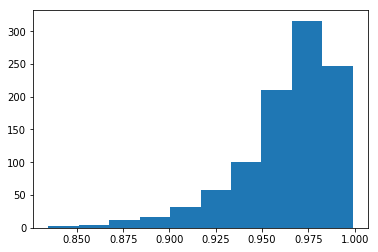

95.0 confidence interval 89.3% and 99.5%


In [63]:
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [64]:
rfTree_random_model_df

,Trainng Score,Validation Score,RMSE,R Squared
0,0.951906,0.86578,0.394764,0.844324


## Conclusion ::-

- From the above we have come to the conclusion that RandomForestRegressor is giving the good accuracy score. 
- I have also tested with validation data which is also giving better result with RandomForestRegressor. 
- Hence we can proceed with the RandomForestRegressor to  modeling of strength of high performance concrete.